# Gender Classification Using ML Algorithms

#### Content
This dataset contains 7 features and a label column.

longhair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".

foreheadwidthcm - This column is in CM's. This is the width of the forehead.

foreheadheightcm - This is the height of the forehead and it's in Cm's.

nosewide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".

noselong - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".

lipsthin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".

distancenosetoliplong - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

gender - This is either "Male" or "Female".

In [1]:
#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math
import random
#Rest librarires will be imported where ever required

In [3]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 2\\Sem_preparation\\gender_classification.csv')
df.head()#first 5 observations

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
df.tail()#last 5 observations

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [5]:
df.shape#5001 records and 8 columns

(5001, 8)

In [6]:
df.info()#summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [7]:
df.isnull().sum()#checking for missing values

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [8]:
df.describe()#stastical summary

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [9]:
df['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [10]:
#inference: dataset is balanced (SMOTE not reuired)

In [11]:
df['gender']=df['gender'].replace('Male',1)
df['gender']=df['gender'].replace('Female',0)

In [12]:
#Model Building

In [13]:
#train_test_split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=df.drop('gender',axis=1)
Y=df['gender']

In [16]:
X.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0


In [17]:
Y.head()

0    1
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [18]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 2, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3500, 7)
y_train (3500,)
X_test (1501, 7)
y_test (1501,)


In [19]:
#Algorithms

In [20]:
#1.K-Nearest Neighbour Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# define the K nearest neighbours model
knc = KNeighborsClassifier()

# train our K nearest neighbours model with the x and y training sets
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
# apply the model on unseen testing data
knc_preds = knc.predict(X_test)
from sklearn import metrics
print("Accuracy of K-Nearest Neighbour Classifier:", metrics.accuracy_score(y_test, knc_preds))

Accuracy of K-Nearest Neighbour Classifier: 0.9673550966022652


In [24]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
test_report_knc = classification_report(y_test, knc_preds)
# print the performace measures
print(test_report_knc)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       746
           1       0.97      0.96      0.97       755

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [25]:
#2.Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(max_depth = 4, criterion = 'gini', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train,y_train)

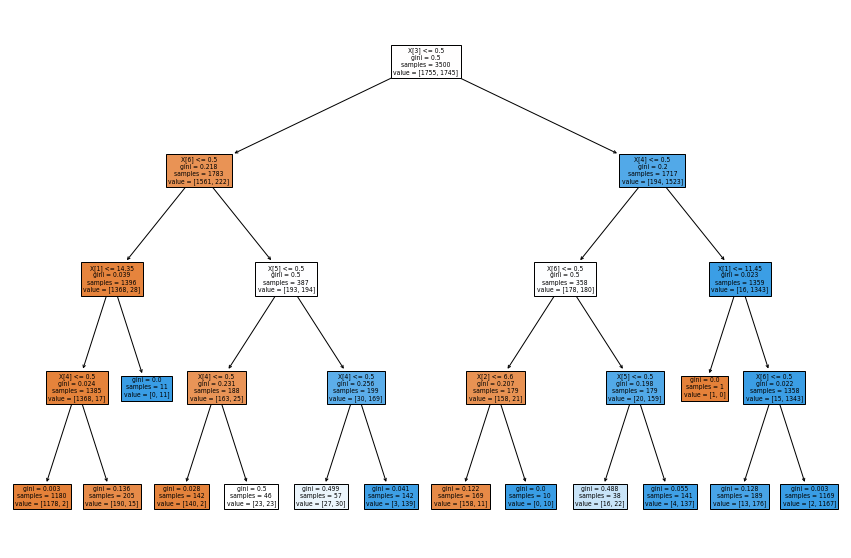

In [28]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True)
plt.show()

In [29]:
# apply the model on unseen testing data
dt_preds = decision_tree_classification.predict(X_test)
from sklearn import metrics
print("Accuracy of Decision Tree Classifier:", metrics.accuracy_score(y_test, dt_preds))

Accuracy of Decision Tree Classifier: 0.966022651565623


In [30]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_dt = classification_report(y_test, dt_preds)
# print the performace measures
print(test_report_dt)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       746
           1       0.97      0.97      0.97       755

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [31]:
##Bagging

In [32]:
#3. Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
Random_Forest_Classifier=RandomForestClassifier()
# fit the model using fit() on train data
Random_Forest = Random_Forest_Classifier.fit(X_train,y_train)

In [35]:
# apply the model on unseen testing data
Rf_preds = Random_Forest_Classifier.predict(X_test)
from sklearn import metrics
print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test, Rf_preds))

Accuracy of Random Forest Classifier: 0.9680213191205863


In [36]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_rf = classification_report(y_test, Rf_preds)
# print the performace measures
print(test_report_rf)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       746
           1       0.97      0.97      0.97       755

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



In [37]:
##Boosting

In [38]:
# XGBoost (extreme gradient boost) Classifier

In [39]:
from xgboost import XGBClassifier

In [ ]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train,y_train)

[20:22:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
# apply the model on unseen testing data
xg_preds = xgb_model.predict(X_test)
from sklearn import metrics
print("Accuracy of XGBoost (extreme gradient boost) Classifier:", metrics.accuracy_score(y_test, xg_preds))

In [ ]:
from sklearn.metrics import classification_report
# compute the performance measures on test data
# call the function 'get_test_report'
test_report_xg = classification_report(y_test, xg_preds)
# print the performace measures
print(test_report_xg)

In [ ]:
#------------------------------------------------END--------------------------------------------------------------------#